### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient = pd.read_csv('Patient 339_data.csv')

In [3]:
patient.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,...,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000
mean,0.066242,0.283209,0.625434,1.448139,1.685813,3.676376,1.240999,1.091408,1.024716,1.017007,...,1.896167,1.853028,2.046467,1.920956,1.037644,1.663474,2.033658,1.979344,1.933447,36.378351
std,0.018518,0.022734,0.038305,0.036799,0.029422,4.352849,0.121782,0.010152,0.007560,0.008565,...,0.016571,0.041332,0.021169,0.018227,0.084200,0.031482,0.012140,0.005857,0.011121,13.733239
min,0.008642,0.227165,0.589049,1.328603,1.647632,1.649923,0.881840,0.979090,1.007351,0.995208,...,1.747737,1.640876,1.926216,1.856833,0.445777,1.495911,2.011668,1.966044,1.894098,20.600000
25%,0.052564,0.273931,0.603774,1.430105,1.662648,2.111373,1.191170,1.084607,1.021949,1.007620,...,1.887788,1.843906,2.045540,1.912900,0.991299,1.646056,2.025400,1.976423,1.927977,29.000000
50%,0.072258,0.280548,0.615232,1.440539,1.673144,2.545947,1.205120,1.089714,1.025978,1.020078,...,1.896565,1.857012,2.050891,1.922105,1.060402,1.659880,2.032168,1.979263,1.932416,33.300000
75%,0.076506,0.289165,0.632075,1.465956,1.712622,3.325015,1.220367,1.099560,1.029703,1.024221,...,1.904621,1.880066,2.055374,1.929629,1.098784,1.677082,2.037504,1.981690,1.937420,37.700000
max,0.122896,0.424602,0.820847,1.539330,1.764456,33.458997,1.984092,1.116021,1.046290,1.034620,...,1.962186,1.937338,2.071669,2.023322,1.138044,1.815752,2.074545,2.030405,2.011161,95.600000


In [4]:
X=patient.drop('BIS', axis=1)
y= patient['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

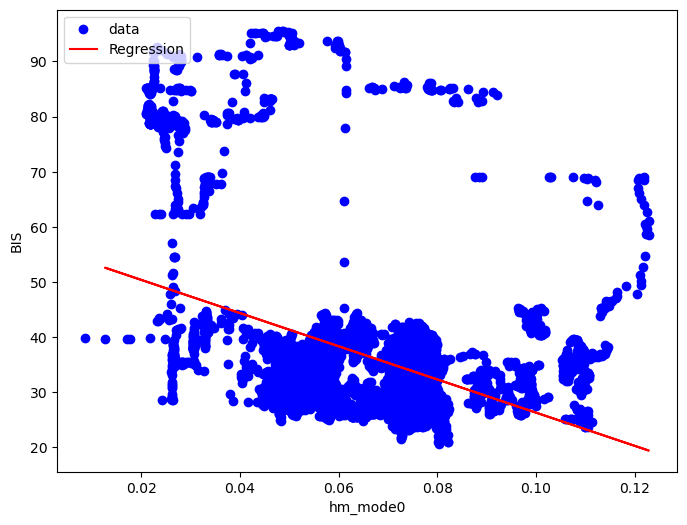

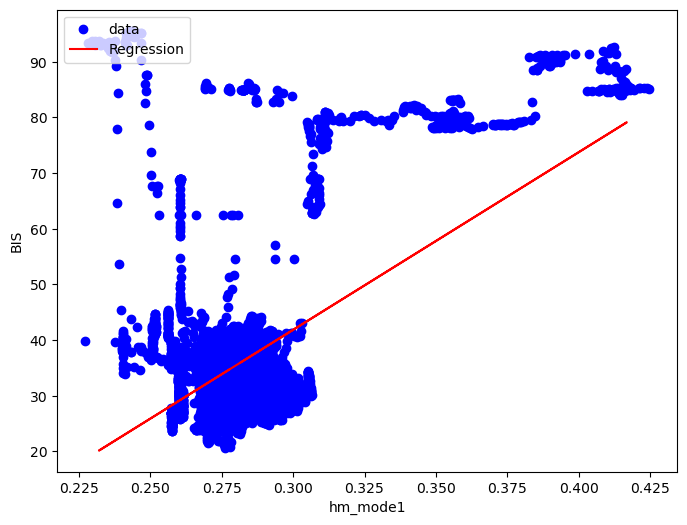

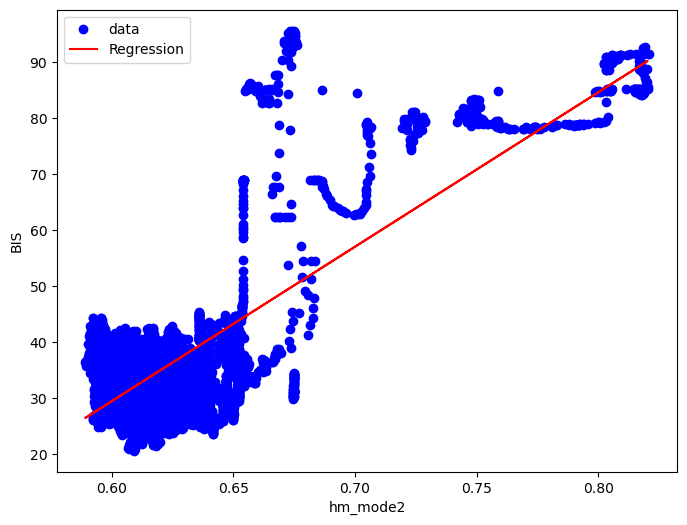

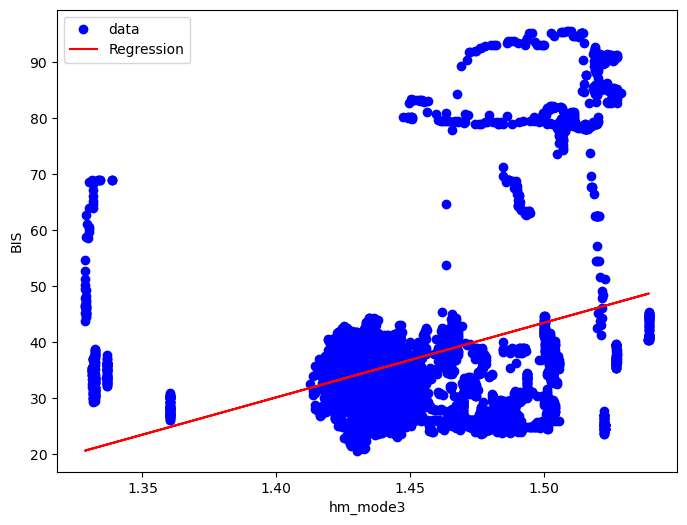

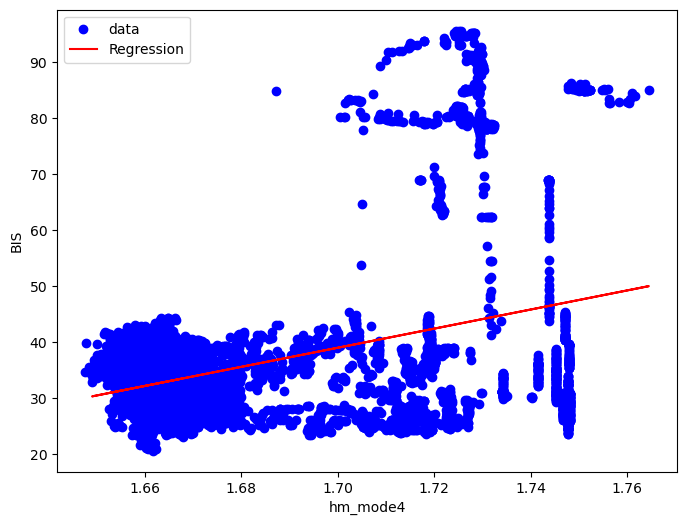

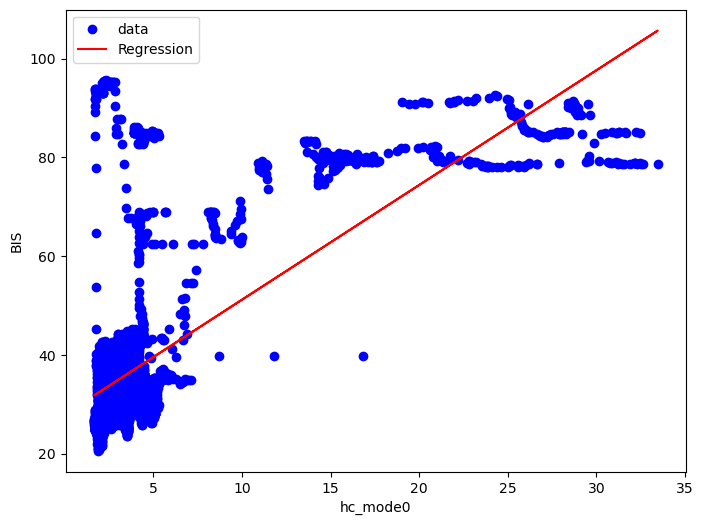

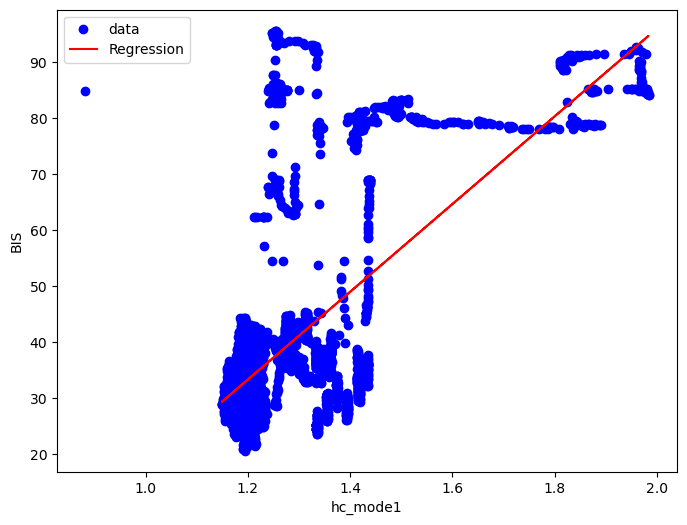

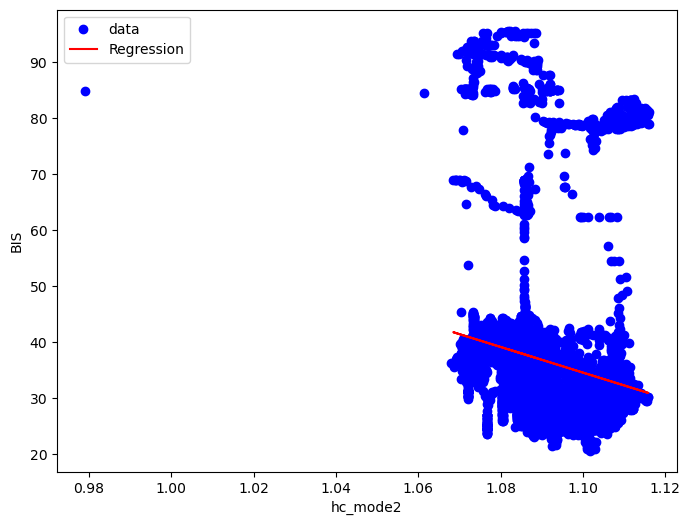

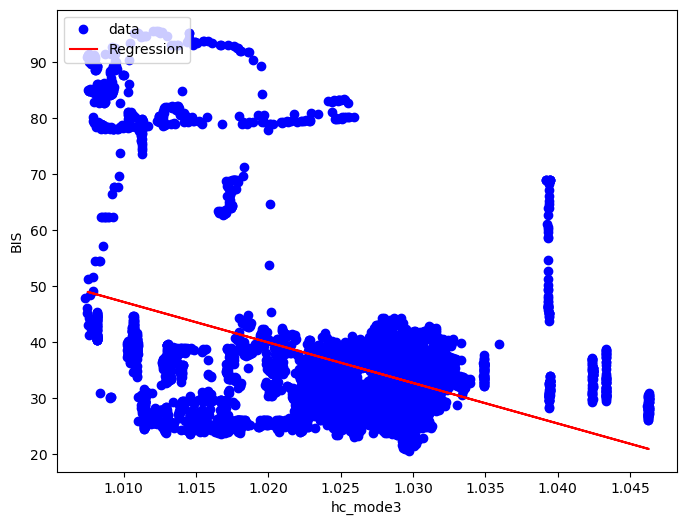

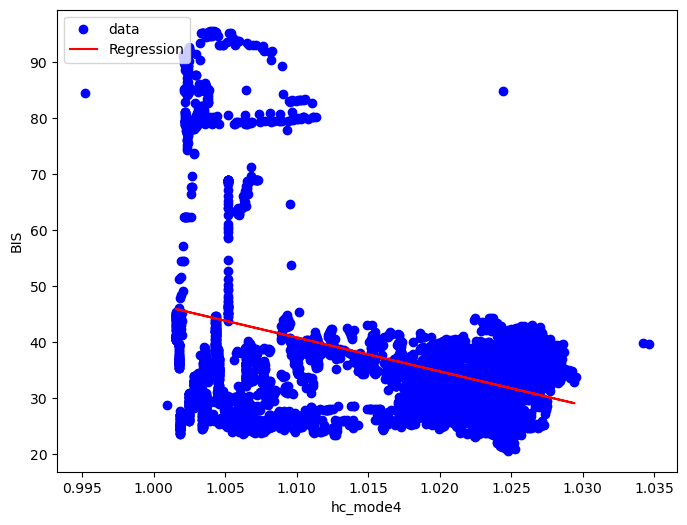

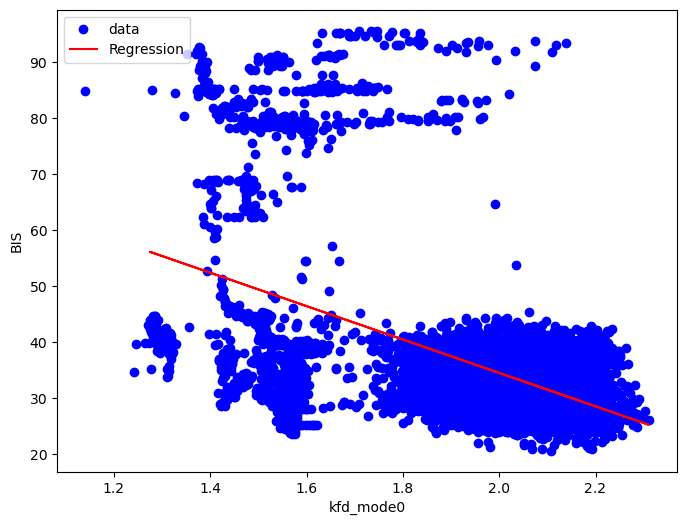

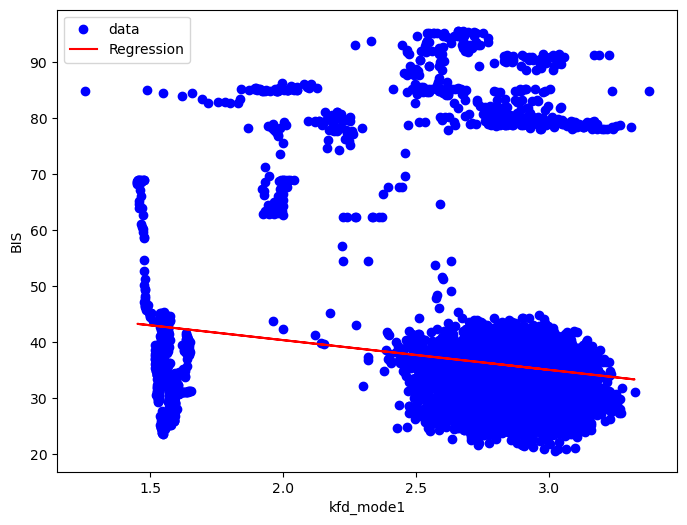

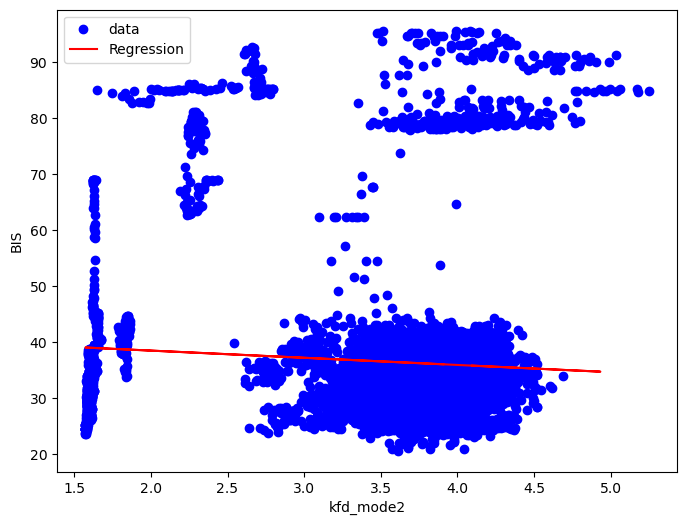

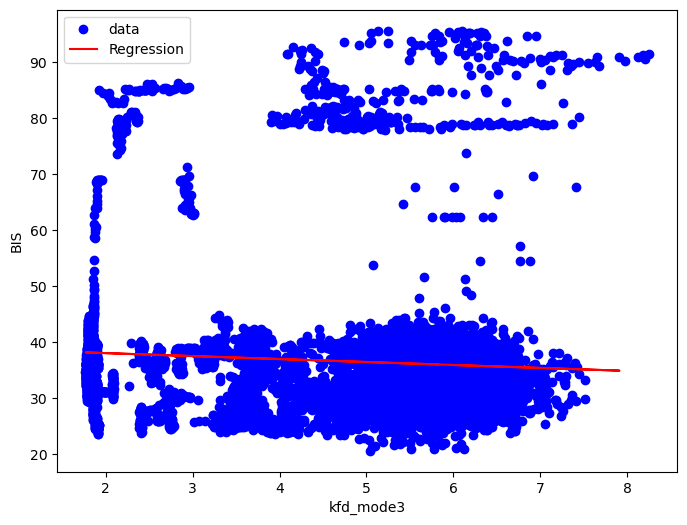

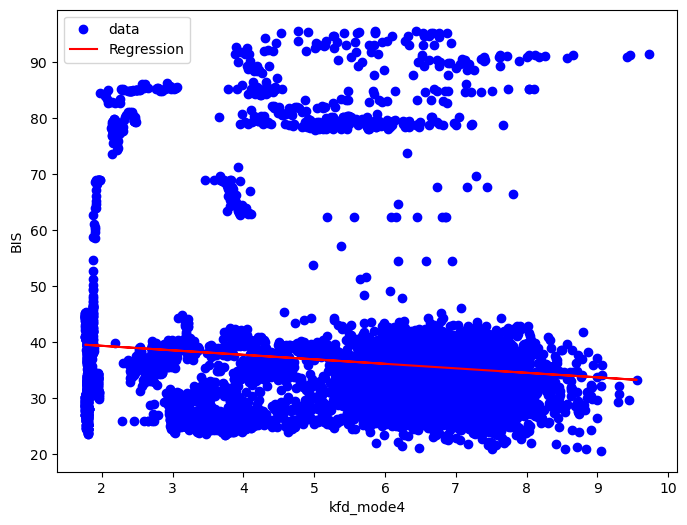

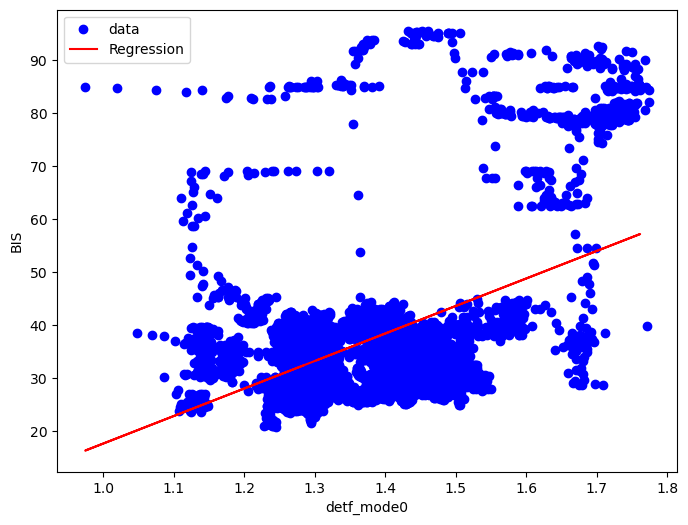

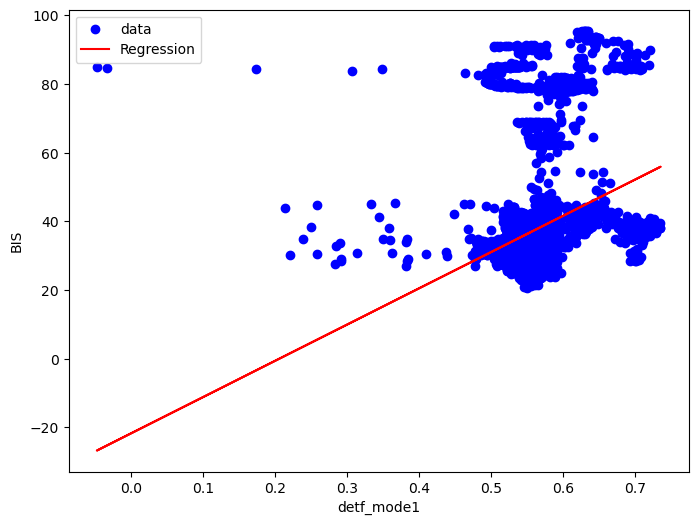

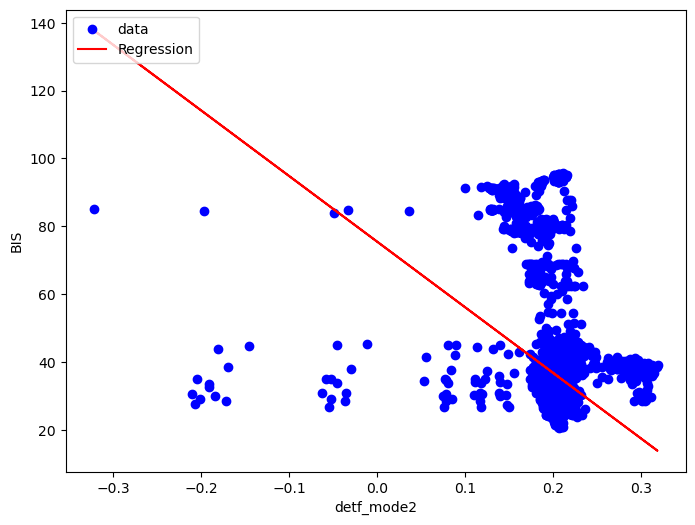

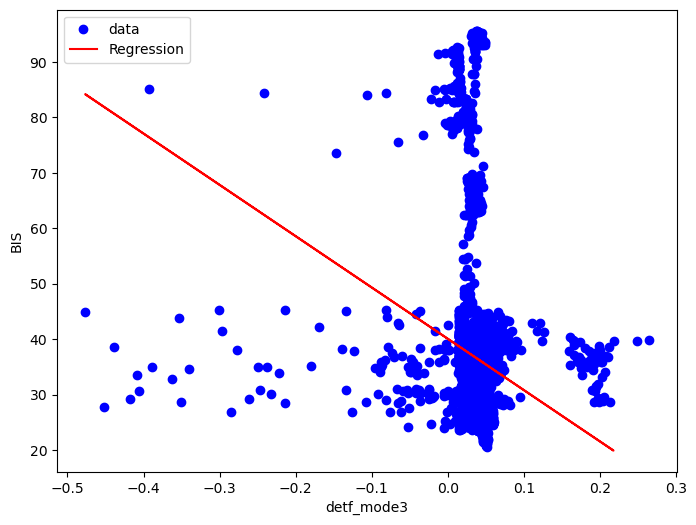

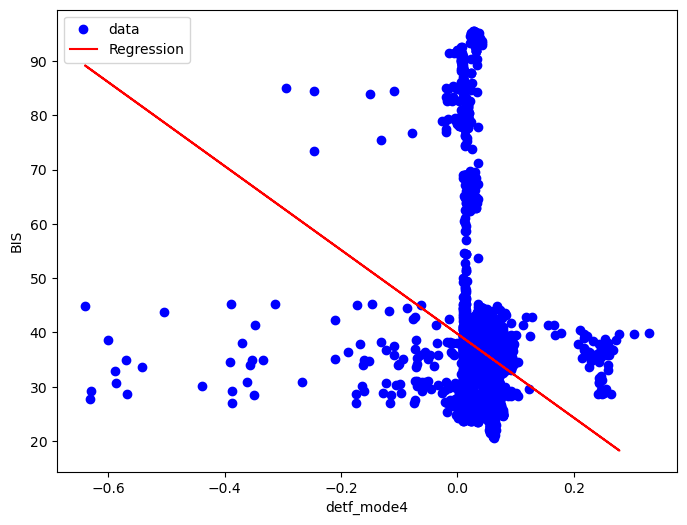

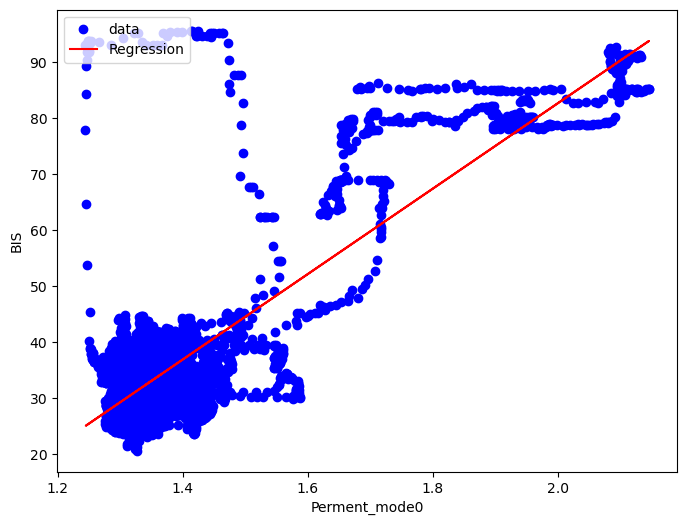

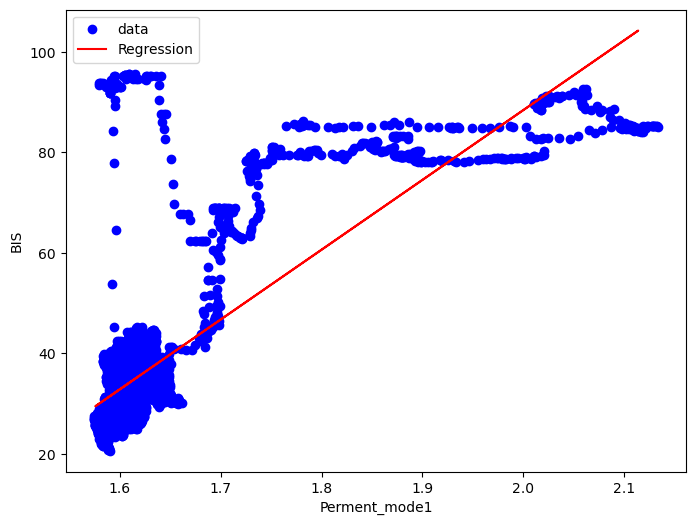

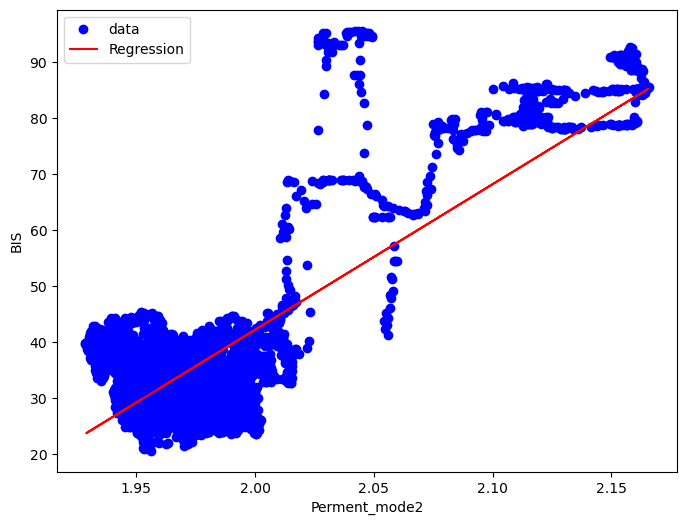

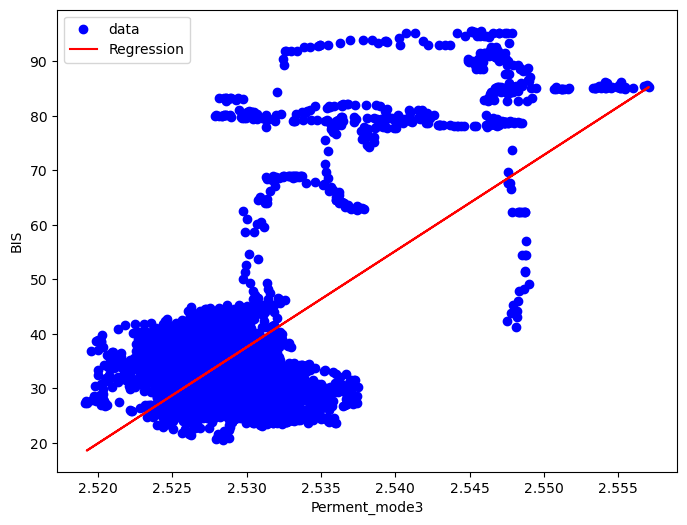

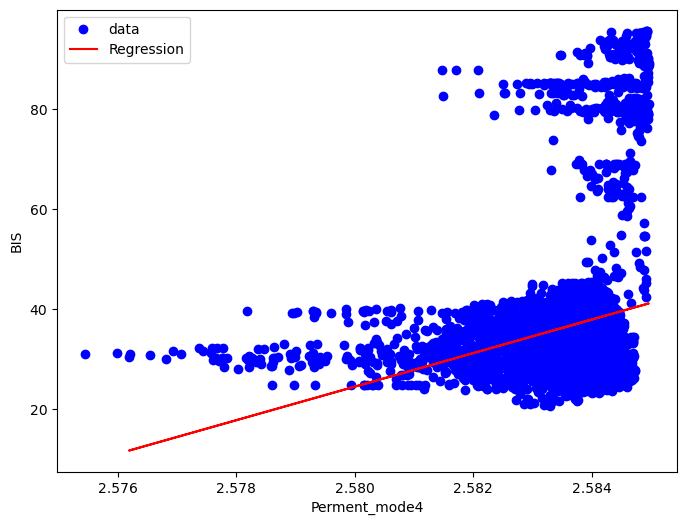

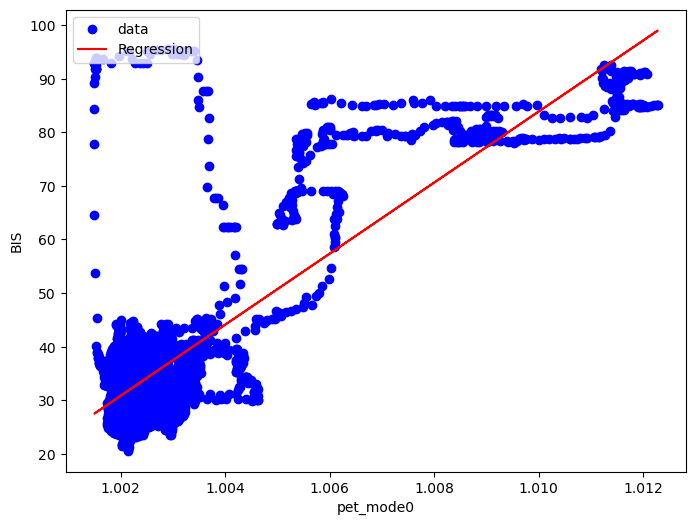

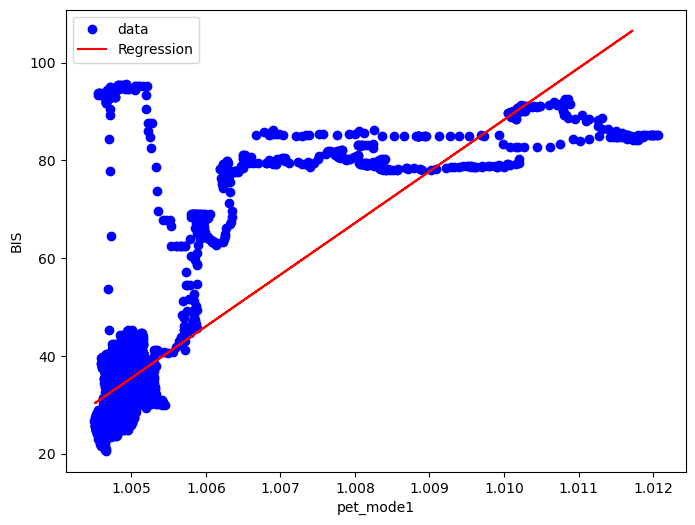

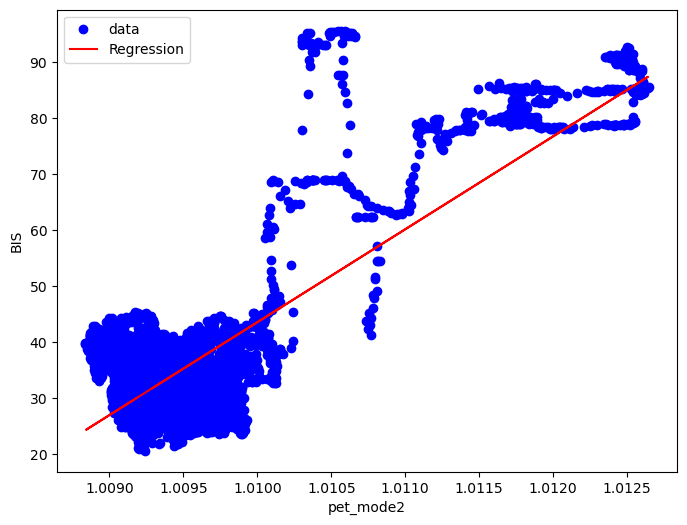

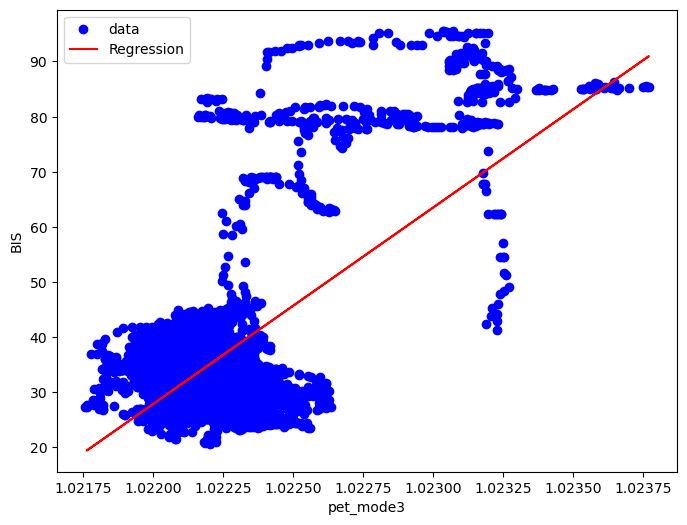

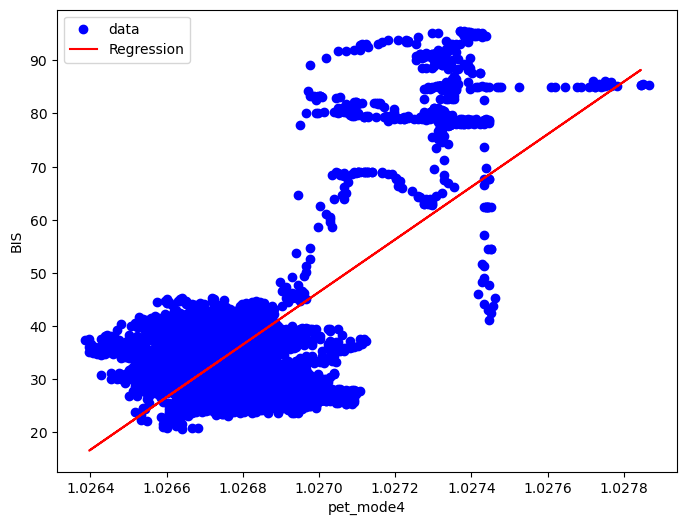

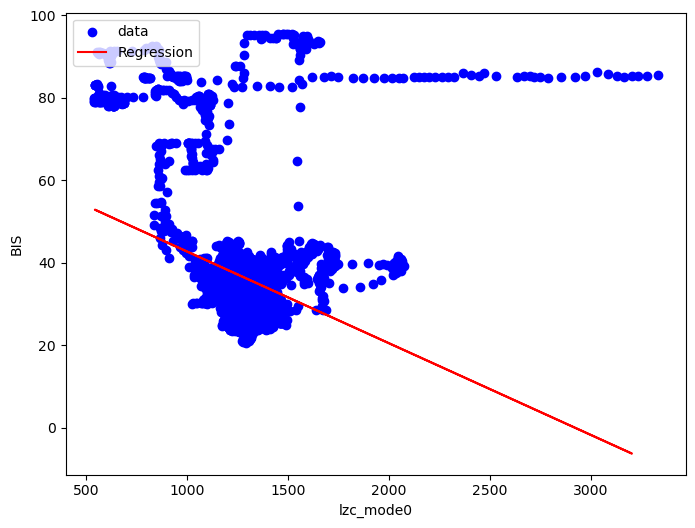

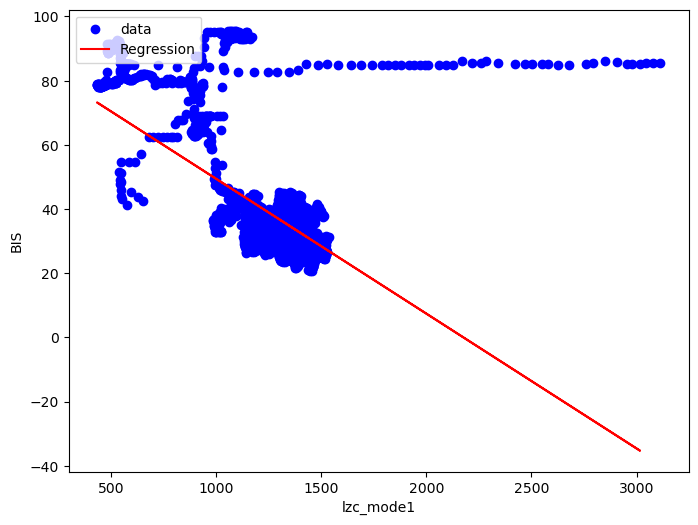

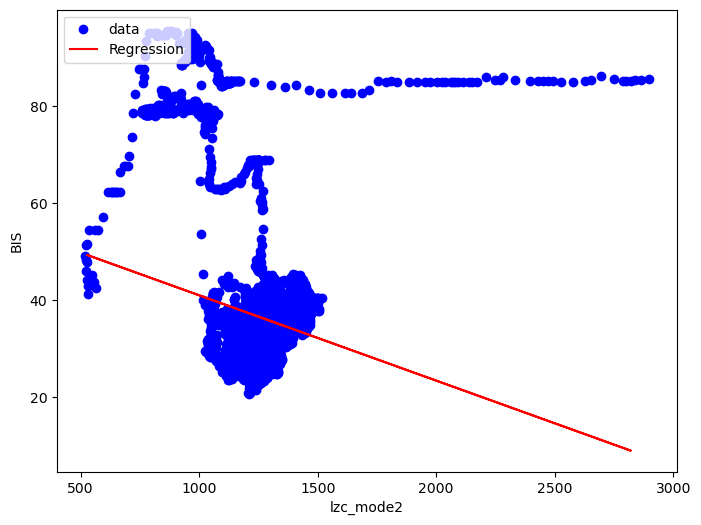

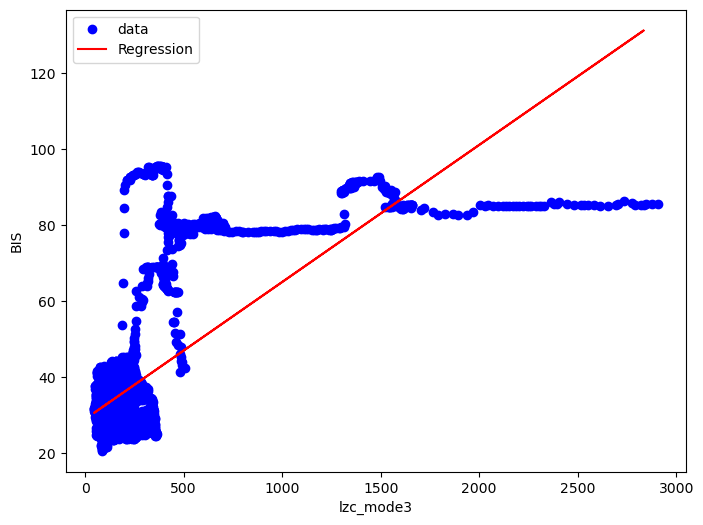

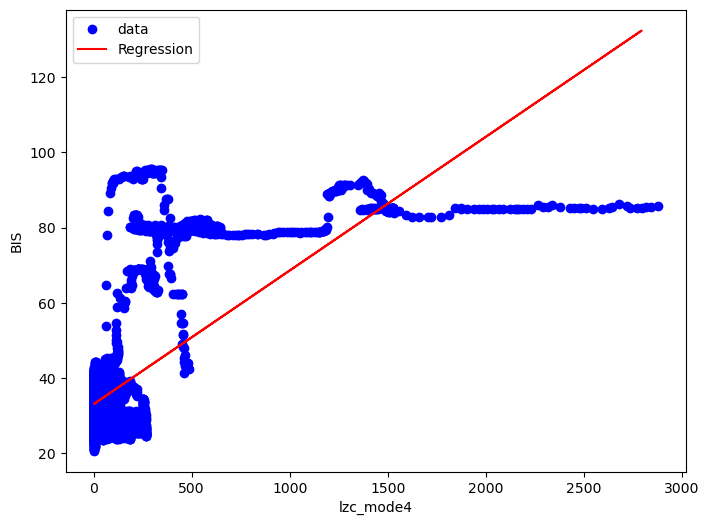

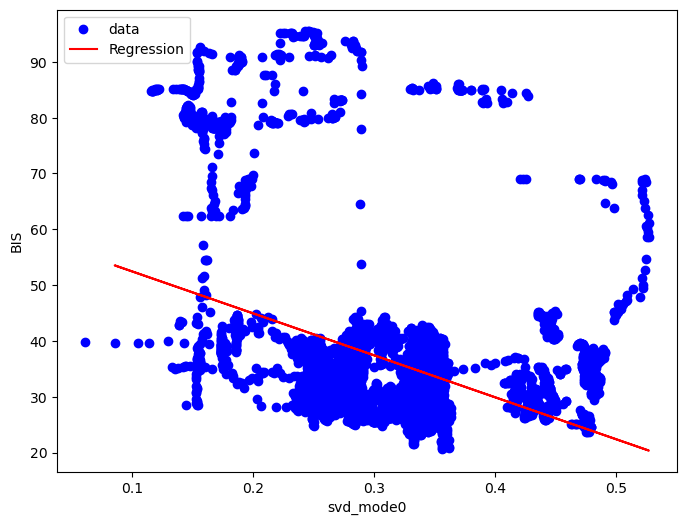

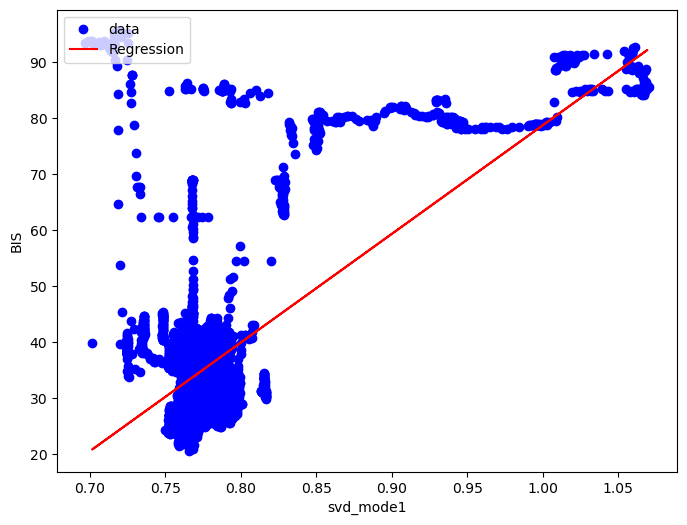

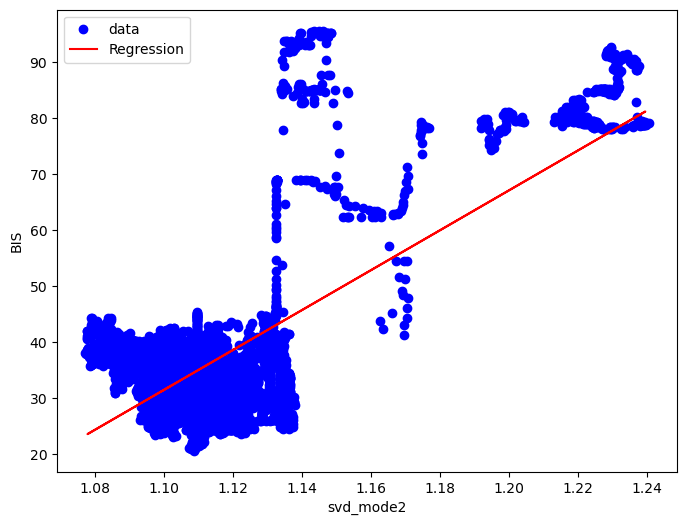

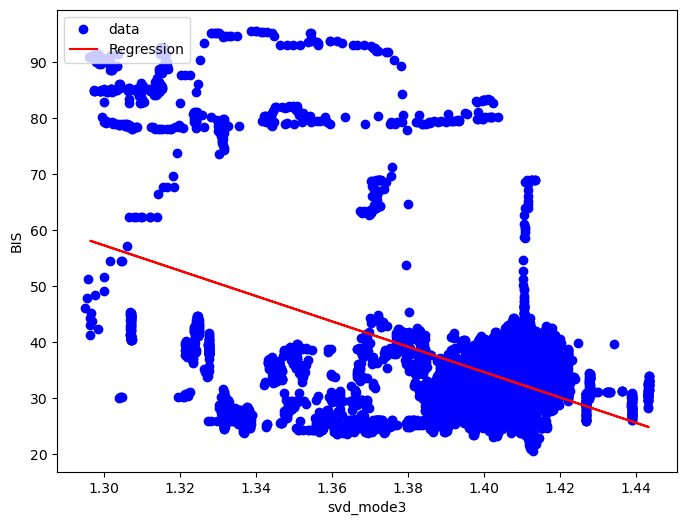

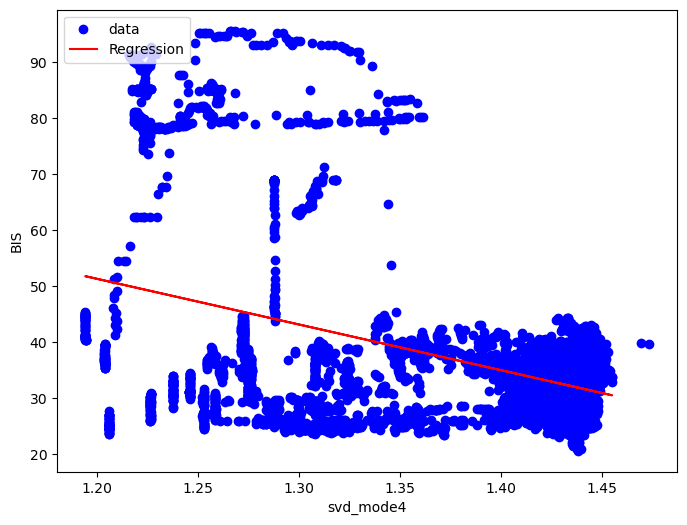

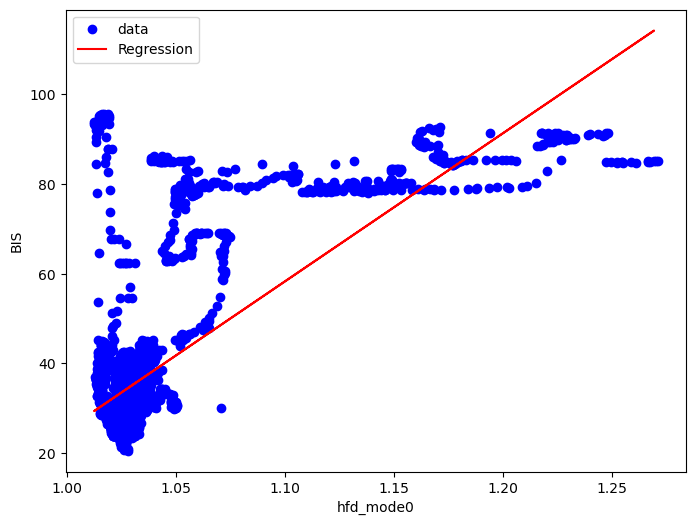

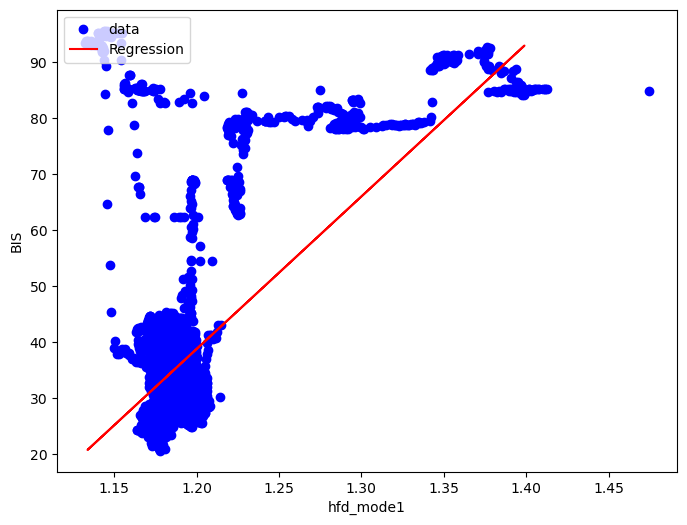

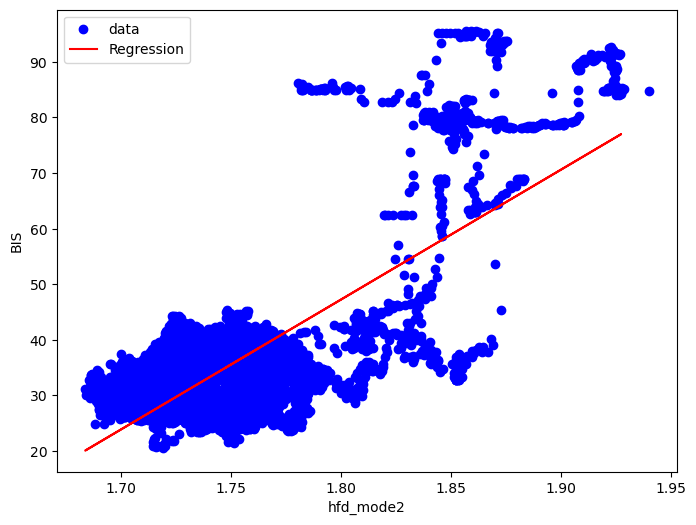

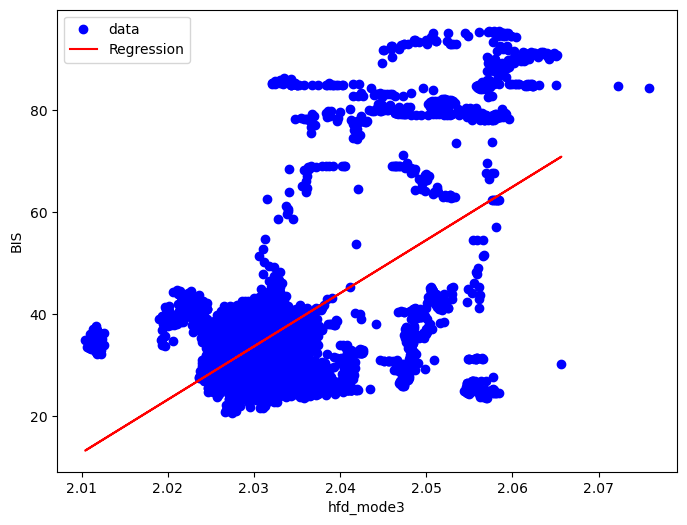

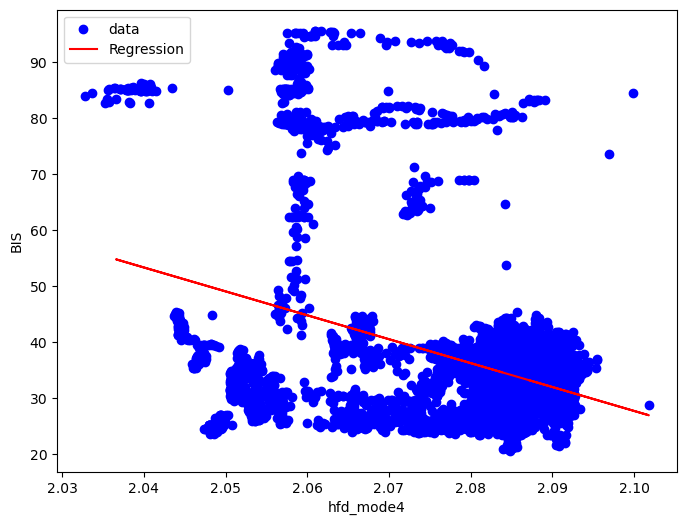

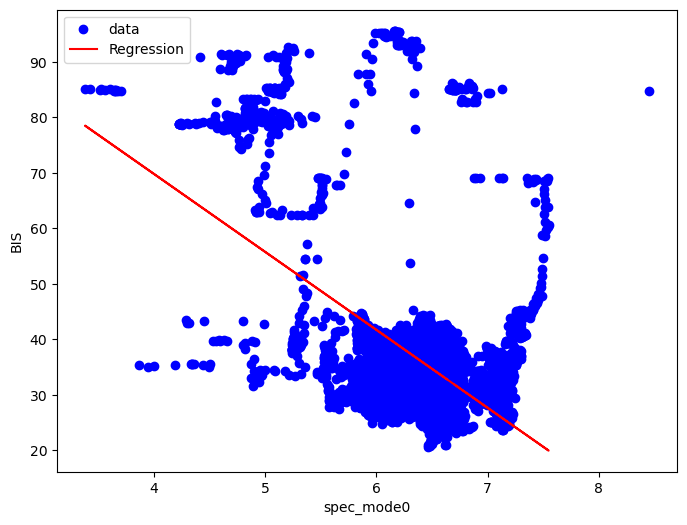

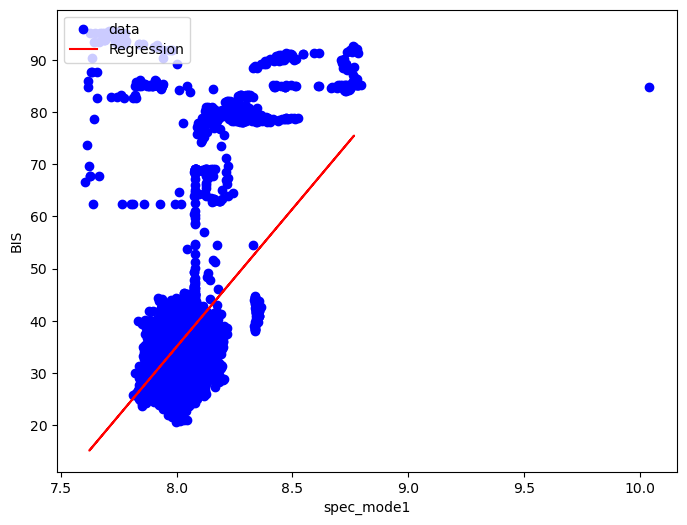

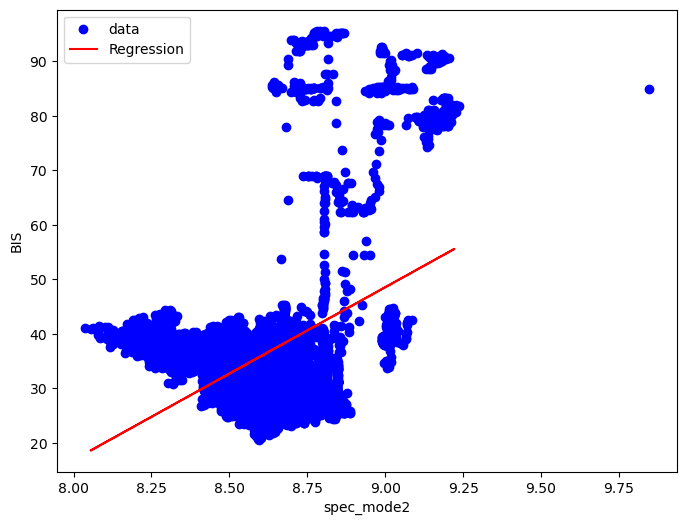

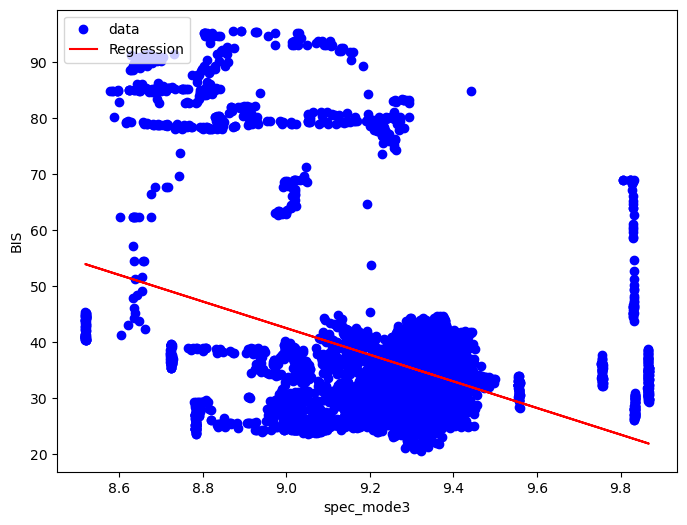

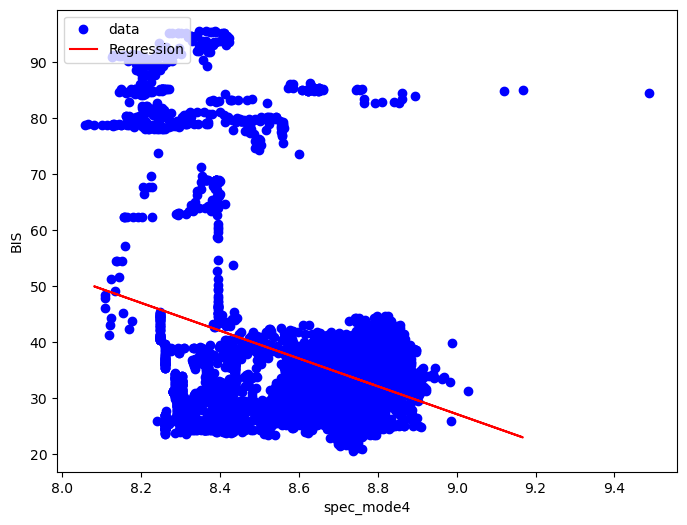

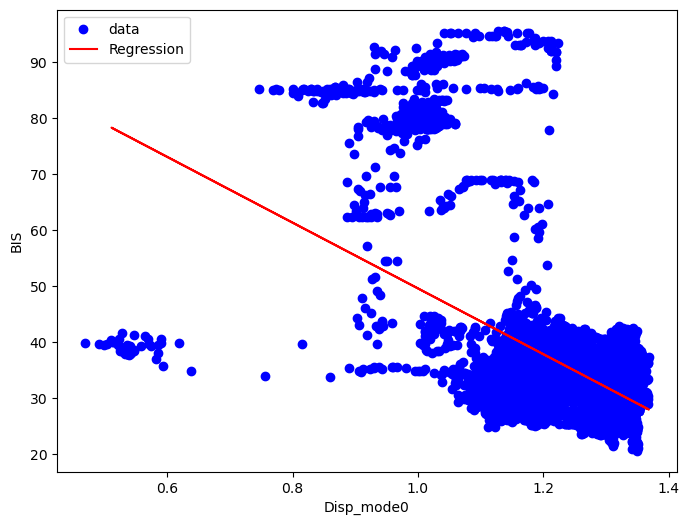

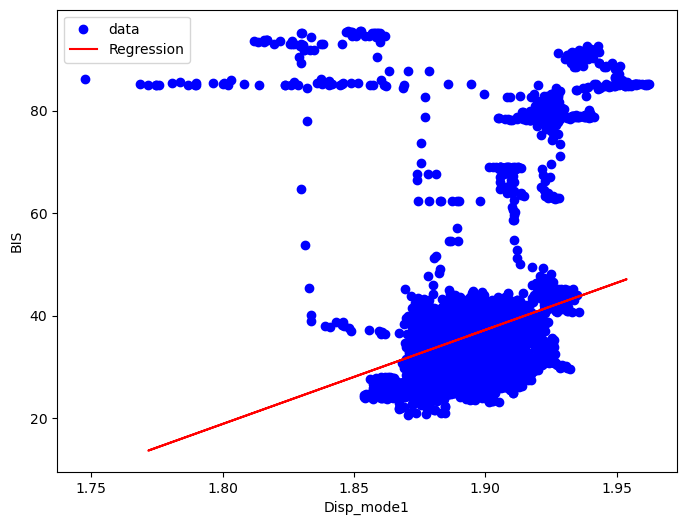

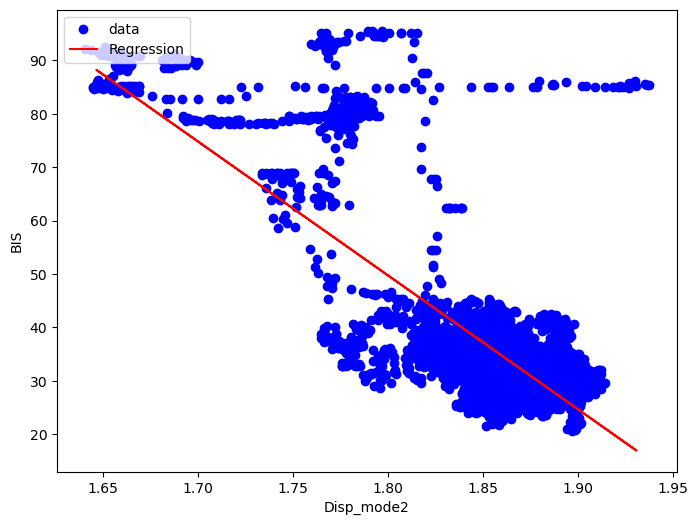

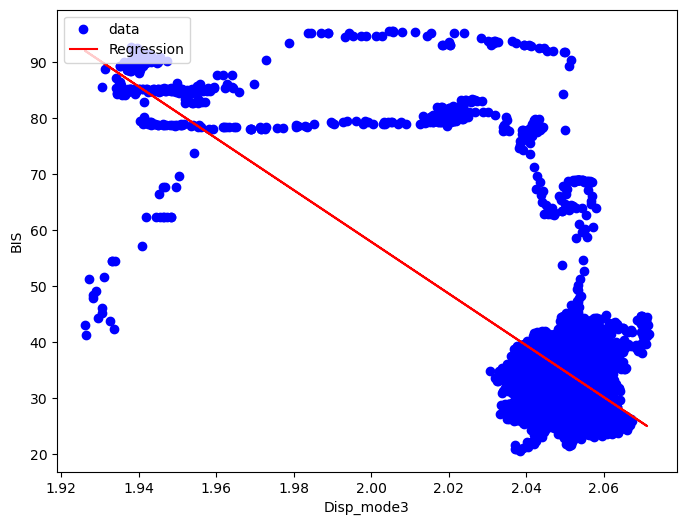

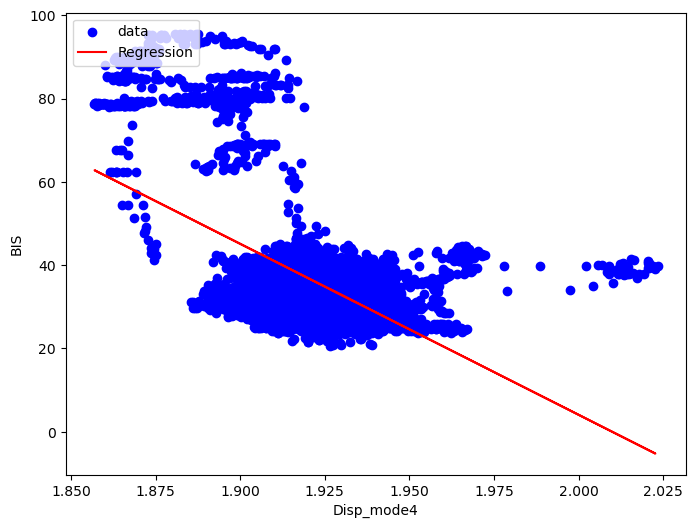

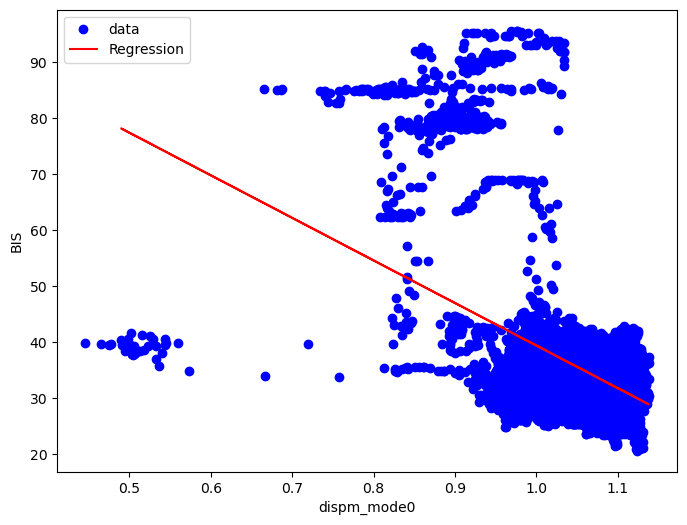

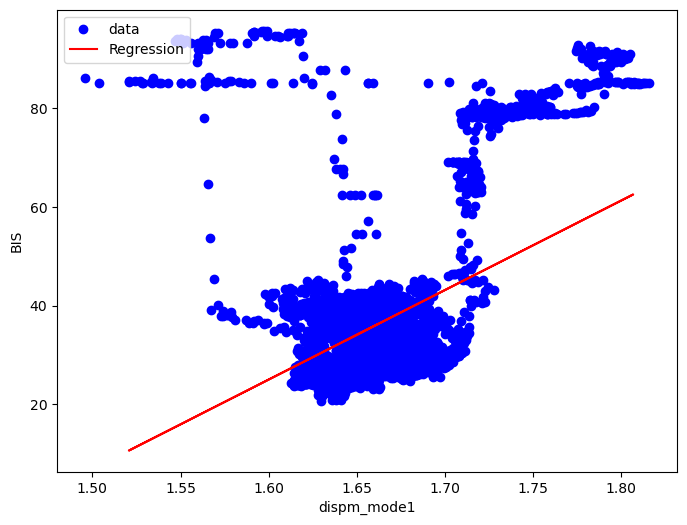

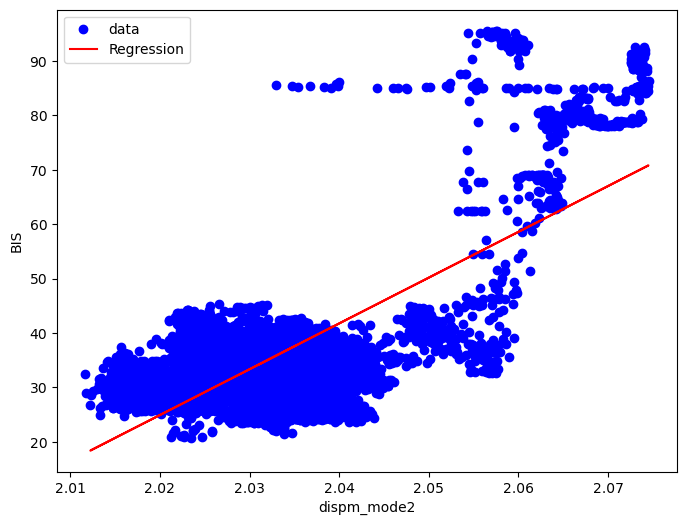

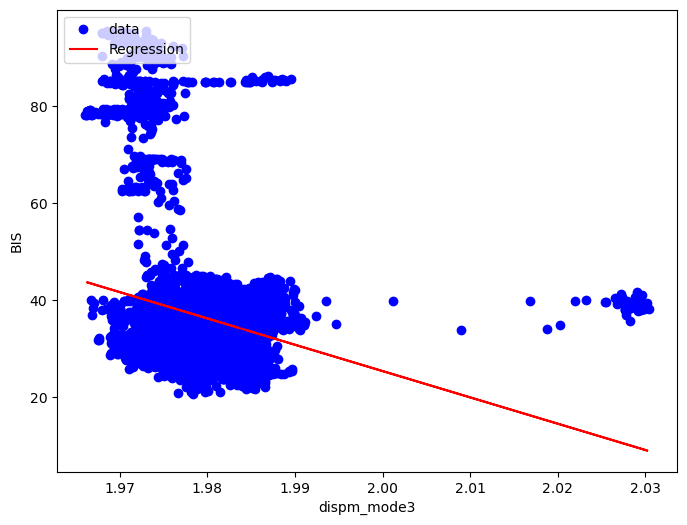

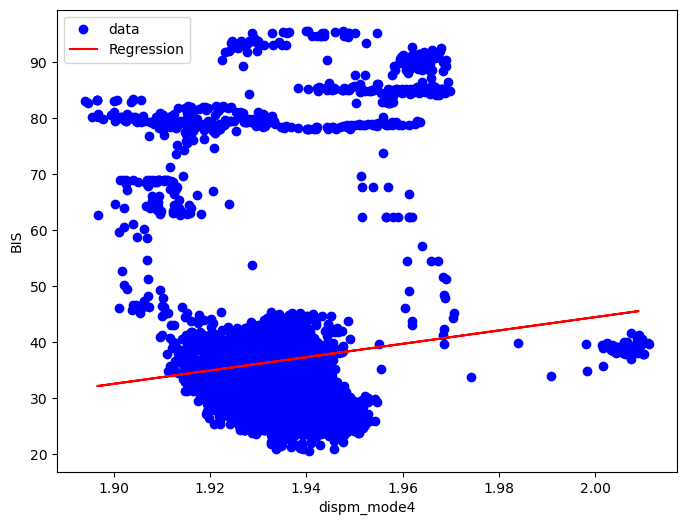

In [6]:

for column in patient.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
25,pet_mode0_r2,67.856936
20,Perment_mode0_r2,67.690793
21,Perment_mode1_r2,67.597855
26,pet_mode1_r2,65.340385
27,pet_mode2_r2,64.241213
22,Perment_mode2_r2,62.951929
52,Disp_mode2_r2,58.768676
2,hm_mode2_r2,58.759585
42,hfd_mode2_r2,56.075595
57,dispm_mode2_r2,55.124459


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
22  Perment_mode2    0.416993
27      pet_mode2    0.414411
7        hc_mode2    0.037190
32      lzc_mode2    0.035007
31      lzc_mode1    0.016006
53     Disp_mode3    0.006767
21  Perment_mode1    0.005994
5        hc_mode0    0.003569
45     spec_mode0    0.003436
57    dispm_mode2    0.003388
59    dispm_mode4    0.003014
26      pet_mode1    0.002817
6        hc_mode1    0.002295
4        hm_mode4    0.002188
11      kfd_mode1    0.002078
33      lzc_mode3    0.001955
56    dispm_mode1    0.001931
43      hfd_mode3    0.001822
38      svd_mode3    0.001717
40      hfd_mode0    0.001499
55    dispm_mode0    0.001493
52     Disp_mode2    0.001428
1        hm_mode1    0.001301
58    dispm_mode3    0.001292
34      lzc_mode4    0.001281
3        hm_mode3    0.001268
29      pet_mode4    0.001228
15     detf_mode0    0.001205
35      svd_mode0    0.001191
24  Perment_mode4    0.001177
30      lzc_mode0    0.001150
12      kfd_mode2    0.001141
39      sv